In [138]:
# Import packages
import os
import numpy as np 
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
%matplotlib inline

In [3]:
path = os.path.join(os.getcwd(), 'data', 'regression_part2.csv')
part2=pd.read_csv(path,delimiter=',')
x=np.array([[1,part2['input'][i]] for i in range (25)])
part2

,input,output
0,2.728,9.088
1,3.244,12.786
2,-4.164,-10.016
3,4.875,32.976
4,3.329,10.437
5,4.268,21.681
6,-2.879,-5.204
7,-2.276,-1.465
8,2.688,8.539
9,2.780,6.929


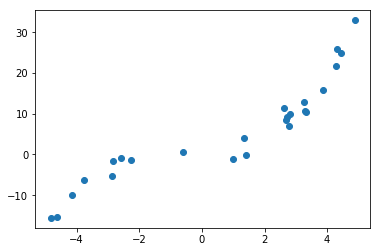

In [4]:
plt.scatter(part2['input'],part2['output'])
plt.show()

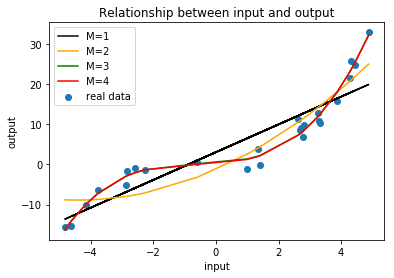

In [30]:
lg=LinearRegression(fit_intercept=False)
lg.fit(x,part2['output'])
lg_output=list(map(lambda n:n*lg.coef_[1]+lg.coef_[0],part2['input']))
plt.scatter(part2['input'],part2['output'],label='real data')
plt.plot(part2['input'],lg_output,color='black',label='M=1')
colors=['black','orange','green','red']
y_pred_all=[np.array(lg_output)]
for i in [2,3,4]:
    Input=[('polynomial',PolynomialFeatures(degree=i)),('modal',LinearRegression())]
    pipe=Pipeline(Input)
    pipe.fit(np.array(part2['input']).reshape(-1,1),np.array(part2['output']).reshape(-1,1))
    poly_pred=pipe.predict(np.array(part2['input']).reshape(-1,1))
    y_pred_all.append(poly_pred)
#     print(poly_pred)
#     print('\n')
    sorted_zip = sorted(zip(np.array(part2['input']),poly_pred),key=lambda t:t[0])
    x_poly, poly_pred = zip(*sorted_zip)
    plt.plot(x_poly,poly_pred,color=colors[i-1],label='M='+str(i))
plt.xlabel('input')
plt.ylabel('output')
plt.legend()
plt.title('Relationship between input and output')
plt.show()
#list(zip(np.array(part2['input']),poly_pred))
#np.array(part2['input'])
#poly_pred

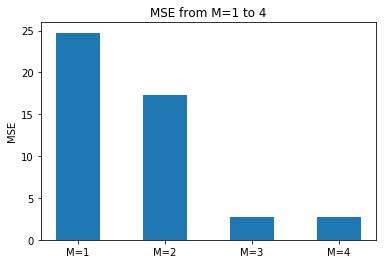

In [39]:
x_coordinates=[1,2,3,4]
bar=[sum([(part2['output'][i]-y_pred_all[j][i])**2 for i in range(25)])/25for j in range (4)]
fig,ax=plt.subplots()
ax.bar(['M=1','M=2','M=3','M=4'],height=bar,width=0.5)
# for i in range (4):
#     ax.text(i,bar[i],str(bar[i]))
plt.ylabel('MSE')
plt.title('MSE from M=1 to 4')
plt.show()

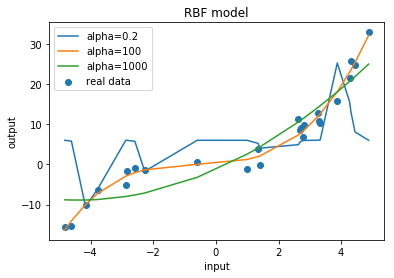

In [143]:
C=[-4,-2,2,4]
alpha=[0.2,100,1000]
plt.scatter(part2['input'],part2['output'],label='real data')
for a in alpha:
    X=([[1]+[math.exp(((x-c)**2)/(-2*a*a)) for c in C]for x in part2['input']])
    mlg=LinearRegression(fit_intercept=False)
    mlg.fit(X,part2['output'])
    Y=mlg.predict(X)
    sorted_X=np.transpose(sorted(zip(part2['input'],Y),key=lambda t:t[0]))
    plt.plot(sorted_X[0],sorted_X[1],label='alpha='+str(a))
plt.xlabel('input')
plt.ylabel('output')
plt.title('RBF model')
plt.legend()
plt.show()  

